<a href="https://colab.research.google.com/github/KrishnanandSingh/EVA/blob/master/Project-4/Third.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thought

Lets try with 5x5 kernel at the input layer which is equivalent of two 3x3 convolutions but with less parameters. We will be using max pool at the second layer. Now I think adding 1x1 convolutions at the third layer will help as we have done some convolutions. Now we want to use maxpool once more but adding two 3x3 layers would cause huge number of parameters. Lets try again with the 5x5 kernel followed by a max pool layer and 1x1. 

# Observation

Parameters were reduced to 13k. And this network performed better than the previous one reaching 99.21 validation accuracy on the 17th epoch.

### **Import Libraries and modules**

Install keras quitely
and import it to be able to use it later

In [0]:
!pip install -q keras
import keras

import the numpy library and refer it as np
import models and layers

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

load the dataset into 2D array(X_train and x_test) representing images
and matrix for their prediction classes(y_train, y_test)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Check the dimension of X_train, it has sixty thousand images of dimension 28 by 28.

Import the pyplot module from matplotlib to visualise the 2D array representations as images.

Display the output of plotting command below the code block

(60000, 28, 28)


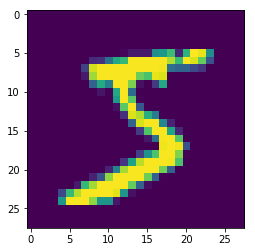

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

 Converting the greyscale image dataset to required input shape for coloured images

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

converting the values to float32 and normalising to convert them in floating values

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

last 10 values from training output

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert 1-dimensional class arrays to 10-dimensional class matrices
e.g. converting output 5 to [0,0,0,0,1,0,0,0,0,0]
now our network can predict values for each class 

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Create the model

In [23]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 5, 5, activation='relu', input_shape=(28,28,1))) #24
model.add(MaxPooling2D(pool_size=(2, 2))) #12
model.add(Convolution2D(10, 1, 1, activation='relu')) #12
model.add(Convolution2D(32, 5, 5, activation='relu')) #8
model.add(MaxPooling2D(pool_size=(2, 2))) #4
model.add(Convolution2D(20, 1, 1, activation='relu')) #4

model.add(Convolution2D(10, 4))#1
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 12, 12, 10)        330       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 32)          8032      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 4, 4, 20)          660       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 1, 1, 10)          3210      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (1, 1), activation="relu")`
  if sys.path[0] == '':


### Train the model

compile the defined model and set configurations to tell how it should learn

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Fitting the model with our training data to start learning.

Look at 32 images at once(batch_size), run 45 times(nb_epoch),  print output(verbose)

In [26]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.1855 - acc: 0.9427 - val_loss: 0.0533 - val_acc: 0.9821
Epoch 2/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0627 - acc: 0.9806 - val_loss: 0.0343 - val_acc: 0.9893
Epoch 3/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0453 - acc: 0.9861 - val_loss: 0.0462 - val_acc: 0.9853
Epoch 4/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0358 - acc: 0.9884 - val_loss: 0.0361 - val_acc: 0.9879
Epoch 5/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.0295 - acc: 0.9908 - val_loss: 0.0386 - val_acc: 0.9876
Epoch 6/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.0258 - acc: 0.9919 - val_loss: 0.0309 - val_acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0208 - acc: 0.9930 - val_loss: 0.

In [27]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
  992/60000 [..............................] - ETA: 9s - loss: 0.0090 - acc: 0.9960

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 10s 159us/step - loss: 0.0137 - acc: 0.9956 - val_loss: 0.0293 - val_acc: 0.9915
Epoch 2/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0125 - acc: 0.9956 - val_loss: 0.0357 - val_acc: 0.9899
Epoch 3/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0119 - acc: 0.9962 - val_loss: 0.0299 - val_acc: 0.9918
Epoch 4/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0101 - acc: 0.9970 - val_loss: 0.0351 - val_acc: 0.9903
Epoch 5/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0089 - acc: 0.9971 - val_loss: 0.0343 - val_acc: 0.9921
Epoch 6/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.0098 - acc: 0.9967 - val_loss: 0.0341 - val_acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0094 - acc: 0.9967 - val_loss: 0.0315 - val_acc: 0.9921
Epoch 8/10
60000/60000 [==============

### Evalutate the model on validation data

calculate loss and accuracy

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03376068323457439, 0.9902]


get predictions on the validation data

In [15]:
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])

[[4.38330190e-15 4.78205312e-13 9.93304106e-10 3.23488649e-08
  3.96495434e-16 4.31150124e-12 4.36412026e-20 1.00000000e+00
  1.08391012e-13 7.80456325e-11]
 [1.83633420e-09 7.34376897e-07 9.99999285e-01 2.97234602e-14
  1.45764721e-13 1.15537852e-14 8.43667497e-12 4.11070077e-13
  5.35794568e-11 1.19259088e-14]
 [1.02709828e-06 9.99700308e-01 6.34741536e-06 4.94255346e-07
  5.77327555e-05 2.95159862e-05 1.66070095e-04 3.08610493e-06
  3.41445157e-05 1.26052203e-06]
 [9.99996543e-01 1.02414930e-13 5.21373300e-09 3.19401935e-11
  6.20381080e-10 2.60992266e-07 2.77681420e-06 9.33645609e-12
  4.05063219e-07 3.42194646e-08]
 [1.47623684e-11 1.68063998e-08 2.99783365e-10 8.93804236e-13
  9.99979377e-01 3.49447450e-11 2.63777555e-09 1.99349426e-10
  4.41281491e-11 2.06469194e-05]
 [3.71707233e-06 9.99853849e-01 6.47451498e-06 3.97615878e-08
  5.41225818e-05 1.15718001e-06 1.47173823e-05 9.00855775e-06
  5.24868265e-05 4.39462656e-06]
 [1.87169837e-16 1.86494153e-09 6.98746394e-10 3.26560064e

### Visualising what filters are trying to extract

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

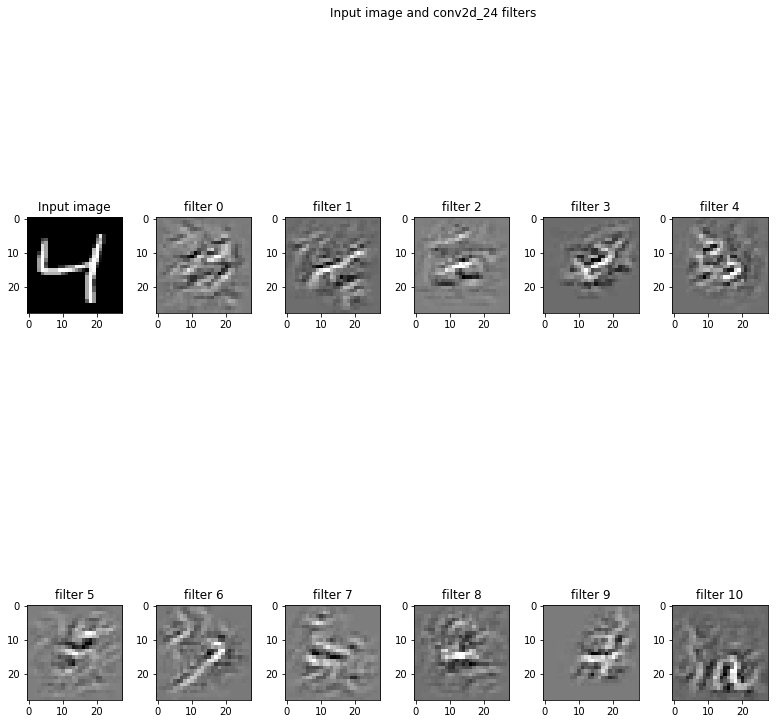

In [30]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(layer_name='conv2d_24')